<a href="https://colab.research.google.com/github/marcus2348532/deep_learning/blob/main/2348532_lab2_dl_ne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, precision_recall_curve
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
import tensorflow as tf

In [2]:
# Load the dataset
df = pd.read_csv("/content/creditcard (1).csv")

**Data Preprocessing**

In [3]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7973 entries, 0 to 7972
Data columns (total 31 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Time    7973 non-null   int64  
 1   V1      7973 non-null   float64
 2   V2      7973 non-null   float64
 3   V3      7973 non-null   float64
 4   V4      7973 non-null   float64
 5   V5      7973 non-null   float64
 6   V6      7973 non-null   float64
 7   V7      7973 non-null   float64
 8   V8      7973 non-null   float64
 9   V9      7973 non-null   float64
 10  V10     7973 non-null   float64
 11  V11     7973 non-null   float64
 12  V12     7973 non-null   float64
 13  V13     7973 non-null   float64
 14  V14     7973 non-null   float64
 15  V15     7972 non-null   float64
 16  V16     7972 non-null   float64
 17  V17     7972 non-null   float64
 18  V18     7972 non-null   float64
 19  V19     7972 non-null   float64
 20  V20     7972 non-null   float64
 21  V21     7972 non-null   float64
 22  

In [5]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,7973.000000,...,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000,7972.000000
mean,4257.151261,-0.299740,0.295226,0.899355,0.215736,-0.025285,0.157286,-0.026445,-0.070525,0.655244,...,-0.053715,-0.165799,-0.035174,0.025977,0.088893,0.020256,0.016150,0.001161,65.413540,0.003136
std,3198.964299,1.498341,1.283914,1.090297,1.447057,1.167218,1.325015,1.063709,1.332568,1.156618,...,0.953498,0.654858,0.488322,0.601760,0.427505,0.517409,0.403570,0.275976,194.911169,0.055915
min,0.000000,-23.066842,-25.640527,-12.389545,-4.657545,-32.092129,-7.574798,-12.968670,-23.632502,-3.878658,...,-11.468435,-8.527145,-15.144340,-2.512377,-2.577363,-1.338556,-7.976100,-3.054085,0.000000,0.000000
25%,1531.000000,-1.046362,-0.237359,0.372435,-0.687521,-0.630525,-0.655399,-0.517733,-0.199794,-0.085635,...,-0.271837,-0.581473,-0.182989,-0.340419,-0.161009,-0.363180,-0.063198,-0.019081,4.617500,0.000000
50%,3635.000000,-0.416341,0.335446,0.948695,0.223379,-0.107337,-0.148669,0.004732,0.016128,0.613170,...,-0.130344,-0.167048,-0.046107,0.089606,0.115418,-0.015260,0.007101,0.018443,15.950000,0.000000
75%,6662.000000,1.122758,0.950582,1.597949,1.131542,0.405082,0.555200,0.527353,0.307111,1.294087,...,0.044823,0.250886,0.086806,0.421015,0.361249,0.329322,0.144700,0.080563,54.910000,0.000000
max,10981.000000,1.685314,8.261750,4.101716,7.380245,11.974269,21.393069,34.303177,3.877662,10.392889,...,22.588989,4.534454,13.876221,3.200201,5.525093,3.517346,4.173387,4.860769,7712.430000,1.000000


In [6]:
df.shape

(7973, 31)

In [7]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       1
V16       1
V17       1
V18       1
V19       1
V20       1
V21       1
V22       1
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [8]:
df.fillna(0,inplace=True)
df.isnull().sum()


Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler instance
scaler = StandardScaler()

# Define the numerical features to be scaled
numerical_features = ['Time','Amount']

# Fit and transform the scaler on the training data
df[numerical_features] = scaler.fit_transform(df[numerical_features])





There is no categorical values are in the data set so no need to perform encoding

Train Test Split

In [10]:
from sklearn.model_selection import train_test_split


X = df.drop('Class', axis=1)
y = df['Class']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [11]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

input_shape = X_train.shape[1]

model = keras.Sequential()

model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [12]:

training_info= model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


model_rmsprop = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_rmsprop.compile(optimizer=keras.optimizers.RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])
history_rmsprop = model_rmsprop.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

model_adam = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(input_shape,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

model_adam.compile(optimizer=keras.optimizers.Adam(learning_rate=0.01), loss='binary_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))


Epoch 1/10
200/200 [==============================] - 2s 4ms/step - loss: 0.0404 - accuracy: 0.9975 - val_loss: 0.0025 - val_accuracy: 1.0000
Epoch 2/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0030 - accuracy: 0.9994 - val_loss: 8.2996e-04 - val_accuracy: 1.0000
Epoch 3/10
200/200 [==============================] - 0s 2ms/step - loss: 0.0015 - accuracy: 0.9997 - val_loss: 4.0530e-04 - val_accuracy: 1.0000
Epoch 4/10
200/200 [==============================] - 0s 2ms/step - loss: 8.4956e-04 - accuracy: 0.9998 - val_loss: 4.4608e-04 - val_accuracy: 1.0000
Epoch 5/10
200/200 [==============================] - 0s 2ms/step - loss: 4.8581e-04 - accuracy: 0.9998 - val_loss: 2.5404e-04 - val_accuracy: 1.0000
Epoch 6/10
200/200 [==============================] - 1s 3ms/step - loss: 3.3403e-04 - accuracy: 0.9998 - val_loss: 2.5053e-04 - val_accuracy: 1.0000
Epoch 7/10
200/200 [==============================] - 0s 2ms/step - loss: 1.8048e-04 - accuracy: 1.0000 - val_loss: 

In [13]:
from sklearn import metrics

y_pred = model.predict(X_test)

class_predictions = (y_pred > 0.5).astype(int)

accuracy = metrics.accuracy_score(y_test, class_predictions)
precision, recall, f1_score, _ = metrics.precision_recall_fscore_support(y_test, class_predictions, average='binary')
roc_auc = metrics.roc_auc_score(y_test, class_predictions)


50/50 [==============================] - 0s 2ms/step


In [14]:

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)  # Convert probabilities to binary predictions
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print("ROC-AUC:", roc_auc_score(y_test, y_pred))

50/50 [==============================] - 0s 2ms/step
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1593
         1.0       1.00      1.00      1.00         2

    accuracy                           1.00      1595
   macro avg       1.00      1.00      1.00      1595
weighted avg       1.00      1.00      1.00      1595

[[1593    0]
 [   0    2]]
ROC-AUC: 1.0


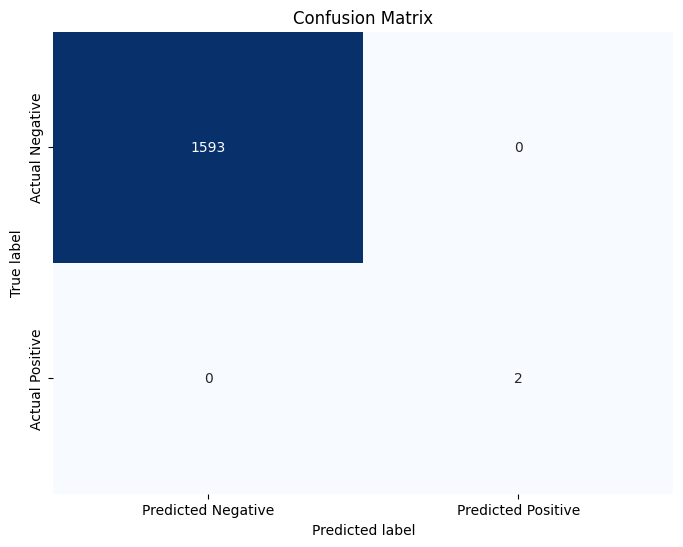

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, class_predictions)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False,
            xticklabels=['Predicted Negative', 'Predicted Positive'],
            yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

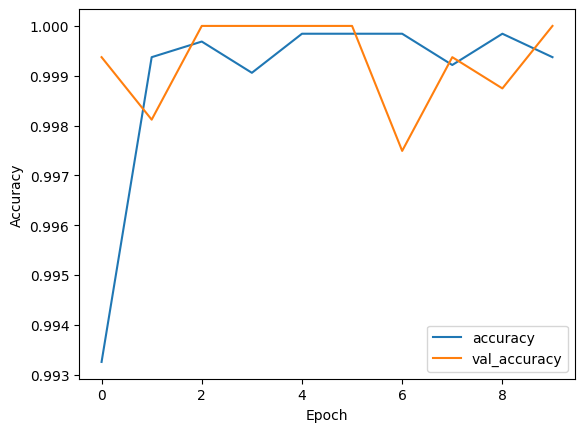

In [16]:
# Visualization
plt.plot(history_adam.history['accuracy'], label='accuracy')
plt.plot(history_adam.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


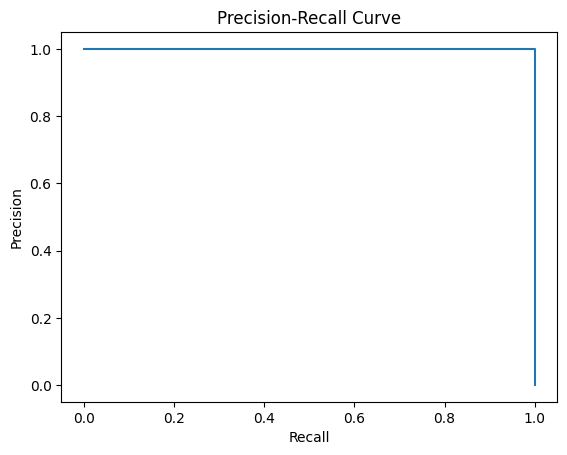

In [17]:
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import PrecisionRecallDisplay

# Calculate precision and recall
precision, recall, _ = precision_recall_curve(y_test, y_pred)

# Display the precision-recall curve
disp = PrecisionRecallDisplay(precision=precision, recall=recall)
disp.plot()
plt.title('Precision-Recall Curve')
plt.show()